# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 8 SOLUTIONS
# Ensemble methods

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave


Import libraries:

In [48]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
%matplotlib inline


import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

# Higgs Boson Discovery

The discovery of the Higgs boson in July 2012 marked a fundamental breakthrough in particle physics. The Higgs boson particle was discovered through experiments at the Large Hadron Collider at CERN, by colliding beams of protons at high energy. A key challenge in analyzing the results of these experiments is to differentiate between a collision that produces Higgs bosons and collisions thats produce only background noise. We shall explore the use of ensemble methods for this classification task.

You are provided with data from Monte-Carlo simulations of collisions of particles in a particle collider experiment. The training set is available in `Higgs_train.csv` and the test set is in `Higgs_test.csv`. Each row in these files corresponds to a particle colision described by 28 features (columns 1-28), of which the first 21 features are kinematic properties measured by the particle detectors in the accelerator, and the remaining features are derived by physicists from the the first 21 features. The class label is provided in the last column, with a label of 1 indicating that the collision produces Higgs bosons (signal), and a label of 0 indicating that the collision produces other particles (background). 

The data set provided to you is a small subset of the HIGGS data set in the UCI machine learning repository. The following paper contains further details about the data set and the predictors used: <a href = "https://www.nature.com/articles/ncomms5308">Baldi et al., Nature Communications 5, 2014</a>.


## Question 1 (2pt): Single Decision Tree
We start by building a basic model which we will use as our base model for comparison. 

1.1.Fit a decision tree model to the training set and report the classification accuracy of the model on the test set. Use 5-fold cross-validation to choose the (maximum) depth for the tree. You will use the max_depth you find here throughout the homework. 


In [2]:
data_train = pd.read_csv('./Higgs_train.csv')
data_test = pd.read_csv('./Higgs_test.csv')

In [3]:
data_train.head()

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,class
0,0.376816,-1.583727,-1.707552,0.990897,0.114397,1.253553,0.619859,-1.479572,2.173076,0.753658,0.775216,-0.667111,2.214872,1.278172,-1.193163,0.504715,0.000000,1.108233,-0.463510,0.397156,0.000000,0.522449,1.318622,0.982398,1.359610,0.964809,1.309991,1.083203,1.0
1,0.707330,0.087603,-0.399742,0.918742,-1.229936,1.172847,-0.552574,0.886053,2.173076,1.298317,0.761617,-1.057712,2.214872,0.607474,0.458938,1.017845,0.000000,0.496551,0.956453,0.236231,0.000000,0.439696,0.828885,0.992241,1.157820,2.215780,1.189586,0.937976,1.0
2,0.617290,0.265839,-1.345227,1.154581,1.036646,0.954822,0.377252,-0.147960,0.000000,1.063507,-0.019367,1.110114,0.000000,1.471531,0.204979,-1.064182,2.548224,1.485514,-0.397717,-0.542413,0.000000,1.024506,1.026255,0.986289,0.927720,1.371080,0.981672,0.917436,1.0
3,0.850992,-0.380876,-0.071264,1.468704,-0.795133,0.691818,0.883260,0.496881,0.000000,1.616349,0.124396,1.182797,1.107436,1.287304,0.160377,-0.915513,2.548224,0.944663,0.795718,-1.520171,0.000000,1.197755,1.100534,0.987262,1.353453,1.455383,0.994682,0.953553,1.0
4,0.767540,-0.691572,-0.040191,0.614843,0.143765,0.748614,0.397057,-0.873640,0.000000,1.147862,0.127310,1.324833,2.214872,0.729707,-0.758064,-1.123539,0.000000,0.848031,0.106974,0.502034,1.550981,0.921948,0.864080,0.982839,1.373222,0.601492,0.918621,0.957063,0.0


### Answer 1.1: Single Decision Tree

1.1 Fit a decision tree model to the training set and report the classification accuracy of the model on the test set. You may use 5-fold cross-validation to choose the (maximum) depth for the tree.

In [4]:
X_train = data_train.iloc[:, data_train.columns != ' class']
y_train = data_train[' class']
X_test = data_test.iloc[:, data_test.columns != ' class']
y_test = data_test[' class']

In [5]:
depth = []
for i in range(3,20):
    dt = DecisionTreeClassifier(max_depth=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=5, n_jobs=-1)
    depth.append((i,scores.mean(), scores.std()))
# sanity check    
depth

[(3, 0.62041149381149385, 0.017096535120077552),
 (4, 0.63580570720570717, 0.0082628053511763326),
 (5, 0.64021150901150903, 0.015987929117392097),
 (6, 0.62620630300630309, 0.0088655414118599136),
 (7, 0.62840690400690402, 0.009766914589539915),
 (8, 0.62860030100030095, 0.0080448346367561138),
 (9, 0.62380750100750093, 0.013359274426396337),
 (10, 0.61540649480649479, 0.01187918210211341),
 (11, 0.61161469061469054, 0.017110875758382712),
 (12, 0.603004886004886, 0.013114017999039048),
 (13, 0.60560988580988573, 0.013442594128967115),
 (14, 0.60620408800408798, 0.010494459923892866),
 (15, 0.59741607961607968, 0.019579200517402921),
 (16, 0.59461247921247928, 0.017557647742352894),
 (17, 0.59761208281208278, 0.020642787151084349),
 (18, 0.60061008321008313, 0.016227981024258185),
 (19, 0.60060728400728403, 0.020206817145474759)]

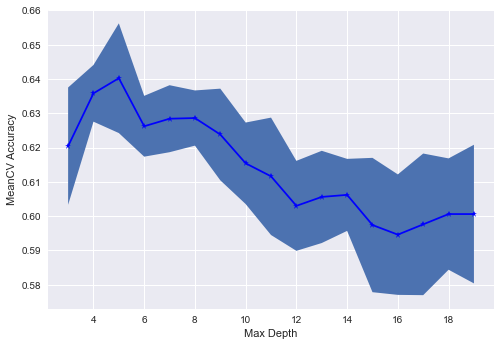

In [6]:
depthvals = [t[0] for t in depth]
cvmeans = np.array([t[1] for t in depth])
cvstds = np.array([t[2] for t in depth])
plt.plot(depthvals, cvmeans, 'b*-')
plt.fill_between(depthvals, cvmeans - cvstds, cvmeans + cvstds)
plt.ylabel("MeanCV Accuracy")
plt.xlabel("Max Depth")
plt.show()

In [7]:
max_indx = np.argmax(cvmeans)
md_best = depthvals[max_indx]
md_best

5

Pavlos' Note: One can use md = 4 even though md_best = 5 since md = 4 is consistent with of best md but a simpler tree. 

In [8]:
dt_single = DecisionTreeClassifier(max_depth=md_best)
dt_single.fit(X_train, y_train).score(X_test, y_test)


0.64559999999999995

## Question 2 (15pt): Dropout-based Approach
We start with a simple method inspired from the idea of 'dropout' in machine learning, where we fit multiple decision trees on random subsets of predictors, and combine them through a majority vote. The procedure is described below.

- For each predictor in the training sample, set the predictor values to 0 with probability $p$  (i.e. drop the predictor by setting it to 0). Repeat this for $B$ trials to create $B$ separate training sets.


- Fit decision tree models $\hat{h}^1(x), \ldots, \hat{h}^B(x) \in \{0,1\}$ to the $B$ training sets. 

- Combine the decision tree models into a single classifier by taking a majority vote:
$$
\hat{H}_{maj}(x) \,=\, majority\Big(\hat{h}^1(x), \ldots, \hat{h}^B(x)\Big).
$$


We shall refer to the combined classifier as an ** *ensemble classifier* **. Implement the described dropout approach, and answer the following questions:

### Answer 2.1 

Apply the dropout procedure with $p = 0.5$ for different number of trees (say $2, 4, 8, 16, \ldots, 256$), and evaluate the training and test accuracy of the combined classifier. Does an increase in the number of trees improve the training and test performance? Explain your observations in terms of the bias-variance trade-off for the classifier.

In [29]:
def dropout_forest(B, p, md=None):
    #set up vote arrays
    votes_test = np.zeros((y_test.shape[0], B))
    votes_train = np.zeros((y_train.shape[0], B))
    # Do B times
    for i in range(B):
        train_set = X_train.copy()
        for column in train_set.columns:
            if np.random.uniform()<p:
                train_set[column] = 0
        votes_test[:,i] = (DecisionTreeClassifier(max_depth=md).fit(train_set, y_train)).predict(X_test)
        votes_train[:,i] = (DecisionTreeClassifier(max_depth=md).fit(train_set, y_train)).predict(X_train)
    #Get majority votes
    y_hat = (np.mean(votes_test,axis=1)>.5).astype(float)
    y_hat_train = (np.mean(votes_train,axis=1)>.5).astype(float)
    return (metrics.accuracy_score(y_test, y_hat), metrics.accuracy_score(y_train, y_hat_train))

In [30]:
test_scores = []
train_scores = []
num_trees = [2**x for x in range(7)]
for B in num_trees:
    tt, tr = dropout_forest(B,.5, md_best)
    test_scores.append(tt)
    train_scores.append(tr)


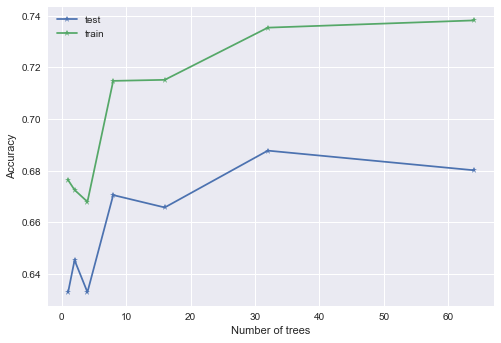

In [31]:
plt.plot(num_trees, test_scores, '*-', label='test')
plt.plot(num_trees, train_scores, '*-', label='train')
plt.legend(loc='best')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.show()

An increase in the number of tree in general leads to an improvement in performance up to 32 trees. At low number of trees, there is high variance, and thus low accuracy. As number of trees increases, we are adding more averaging of (slightly) different models with different columns dropped out. As we increase the number of trees, the averaging first wins, decreasing variance. But as the number of trees becomes very large, there is not much incremetal improvement to be done, and performance plateaus.

The amount of randomness we introduce is not enough (remember we don't bag) to counter the intrinsic overfitting. In other words, there is not much more left to average and the variance does not decrease further.  Indeed there is a large gap between train and test performance, showing us that we did not squeeze enough variance out of this model.

### Answer 2.2 

Fix the number of trees to 64 and apply the dropout procedure with different dropout rates $p = 0.1, 0.3, 0.5, 0.7, 0.9$. Based on your results, explain how the dropout rate influences the bias and variance of the combined classifier.

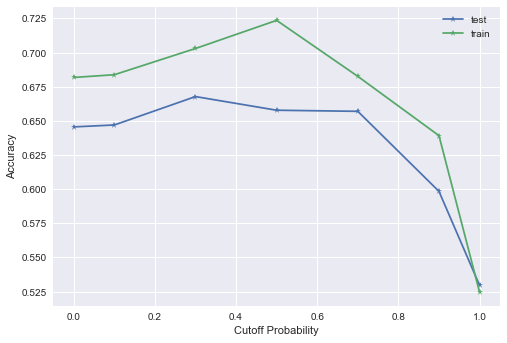

In [32]:
test_scores = []
train_scores = []
p_array = [0., 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

for p in p_array:
    tt, tr = dropout_forest(8,p, md_best)
#     print(tt,tr)
    test_scores.append(tt)
    train_scores.append(tr)
plt.plot(p_array, test_scores, '*-',label='test')
plt.plot(p_array, train_scores, '*-', label='train')
plt.legend(loc='best')
plt.xlabel('Cutoff Probability')
plt.ylabel('Accuracy')
plt.show()

We fix the amount of averaging by fixing the number of trees. But now we change the probability of dropout. For p=0.5, we will on average, for each one of our B trees, drop 1/2 the predictors. Sometimes we'll drop less and sometimes more. And these wont be the same predictors we drop each time.

Consider the other limits. At p=1, we'll drop every predictor, thus creating a model which is highly biased (no learning), since all we are doing then it selects randomly predicts classes.

At p=0, we drop no predictors. All of them remain in, for every tree. So we basically fit the same Decision Tree classifier each time, save some randomness from the decision tree process itself and accurancy is the same as Q1.1. This is the variance limit. 

In between, as p decreases from 1 to 0, we start taking in more and more predictors, decreasing our bias. Our variance increases, but the bias decreases. As p increases from 0, dropping predictors reduces the complexity and therefore each tree is less complex and less overfit. For larger p, our models include many of the same predictors, and the benefits of averaging go down and the variance increases.
 


### Answer 2.3 

Apply 5-fold cross-validation to choose the optimal combination of the dropout rate and number of trees. 

In [33]:
def dropout_forest_cv(X_train_fold, y_train_fold, X_test_fold, y_test_fold, B, p, md=None):
    votes_test = np.zeros((y_test_fold.shape[0], B))
    votes_train = np.zeros((y_train_fold.shape[0], B))
    for i in range(B):
        train_set = X_train_fold.copy()
        for column in train_set.columns:
            if np.random.uniform()<p:
                train_set[column] = 0
        votes_test[:,i] = (DecisionTreeClassifier(max_depth=md).fit(train_set, y_train_fold)).predict(X_test_fold)
        votes_train[:,i] = (DecisionTreeClassifier(max_depth=md).fit(train_set, y_train_fold)).predict(X_train_fold)
    y_hat = (np.mean(votes_test,axis=1)>.5).astype(float)
    y_hat_train = (np.mean(votes_train,axis=1)>.5).astype(float)
    return [metrics.accuracy_score(y_test_fold, y_hat), metrics.accuracy_score(y_train_fold, y_hat_train)]

In [34]:
# this takes a while to learn!
kfold = KFold(n_splits=5)
from collections import defaultdict
results_allfolds = defaultdict(list)
for train, valid in kfold.split(X_train):
    for p in p_array:
        for B in num_trees:
            tt, tr = dropout_forest_cv(X_train.iloc[train], y_train.iloc[train], X_train.iloc[valid], y_train.iloc[valid], B, p, md_best)
            results_allfolds[(p,B)].append((tt,tr))
results_allfolds

defaultdict(list,
            {(0.0, 1): [(0.629, 0.68525000000000003),
              (0.61799999999999999, 0.68874999999999997),
              (0.64500000000000002, 0.69674999999999998),
              (0.64200000000000002, 0.6925),
              (0.63900000000000001, 0.70074999999999998)],
             (0.0, 2): [(0.63, 0.68525000000000003),
              (0.61799999999999999, 0.68799999999999994),
              (0.64500000000000002, 0.69674999999999998),
              (0.64200000000000002, 0.69325000000000003),
              (0.63900000000000001, 0.70074999999999998)],
             (0.0, 4): [(0.629, 0.68525000000000003),
              (0.61599999999999999, 0.68874999999999997),
              (0.64500000000000002, 0.69674999999999998),
              (0.64600000000000002, 0.69350000000000001),
              (0.63900000000000001, 0.70074999999999998)],
             (0.0, 8): [(0.629, 0.68525000000000003),
              (0.61599999999999999, 0.68899999999999995),
              (0.645000

In [35]:
resu = {k: (np.mean(results_allfolds[k][0]), np.mean(results_allfolds[k][1])) for k in results_allfolds}
resu

{(0.0, 1): (0.65712499999999996, 0.65337500000000004),
 (0.0, 2): (0.65762500000000002, 0.65300000000000002),
 (0.0, 4): (0.65712499999999996, 0.65237499999999993),
 (0.0, 8): (0.65712499999999996, 0.65249999999999997),
 (0.0, 16): (0.65712499999999996, 0.65312499999999996),
 (0.0, 32): (0.65762500000000002, 0.65300000000000002),
 (0.0, 64): (0.65762500000000002, 0.65300000000000002),
 (0.1, 1): (0.64050000000000007, 0.64624999999999999),
 (0.1, 2): (0.65000000000000002, 0.65200000000000002),
 (0.1, 4): (0.65762500000000002, 0.67375000000000007),
 (0.1, 8): (0.65812500000000007, 0.65287499999999998),
 (0.1, 16): (0.65762500000000002, 0.65300000000000002),
 (0.1, 32): (0.65850000000000009, 0.65262500000000001),
 (0.1, 64): (0.65762500000000002, 0.65225),
 (0.3, 1): (0.66362500000000002, 0.65525),
 (0.3, 2): (0.65887499999999999, 0.64975000000000005),
 (0.3, 4): (0.66912499999999997, 0.65525),
 (0.3, 8): (0.67637499999999995, 0.66837499999999994),
 (0.3, 16): (0.67312499999999997, 0.6826

In [36]:
resuget = lambda x: resu.get(x)[0] # function to retrive the first value of the "value" in key-value pair/dict
# to retrieve the model with the best test accuracy score
ourmodel = max(resu, key=resuget)

test_accuracy = resu[ourmodel][0]
train_accuracy = resu[ourmodel][1]

(best_dropout, best_num_tree) =  ourmodel

print ("Test accuracy = ", test_accuracy, ", train accuracy = ", train_accuracy)
print ("Best dropout rate = ", best_dropout, ", Best number of trees = ", best_num_tree)

Test accuracy =  0.709625 , train accuracy =  0.69075
Best dropout rate =  0.7 , Best number of trees =  64


### Answer 2.4 

How does the test performance of an ensemble of trees fitted with the optimal dropout rate and number of trees compare with the single decision tree model in Question 1?
[hint: Training with large number of trees can take long time. You may need to restrict the max number of trees.]

In [37]:
# use the same function 
print ("test accuracy, train accuracy")
dropout_forest_cv(X_train, y_train, X_test, y_test, best_num_tree, best_dropout, md_best)


test accuracy, train accuracy


[0.67359999999999998, 0.73699999999999999]

The test performance of an ensemble of trees fitted with the optimal dropout rate and number of trees is slightly better(0.68ish) than the test performance of single decision tree model in Question 1 (0.65ish). 

## Question 3 (15pt): Random Forests

We now move to a more sophisticated ensemble technique, namely random forest:

### Answer 3.1 

How does a random forest approach differ from the dropout procedure described in Question 2? 
<break>
<break>

Random forest fits a number of decision tree classifiers on various sub-samples of the dataset. It can be limited to a certain number of features as we do here but is not always, as the dropout procedure above. Furthermore, the features are just ignored randomly in RF as opped to setting them to 0. We do not bag in the dropout procedure as we do in RF.

### Answer 3.2 

Fit random forest models to the training set for different number of trees (say $2, 4, 8, 16, \ldots, 256$), and evaluate the training and test accuracies of the models. You may set the number of predictors for each tree in the random forest model to $\sqrt{p}$, where $p$ is the total number of predictors. 

In [38]:
train_scores = []
test_scores = []
trees = [2**x for x in range(8)]  # 2, 4, 8, 16, 32, ... 
for n_trees in trees:
    rf = RandomForestClassifier(n_estimators=n_trees, max_depth=md_best, max_features='auto')
    test_scores.append(metrics.accuracy_score(y_test, rf.fit(X_train, y_train).predict(X_test)))
    train_scores.append(metrics.accuracy_score(y_train, rf.fit(X_train, y_train).predict(X_train)))

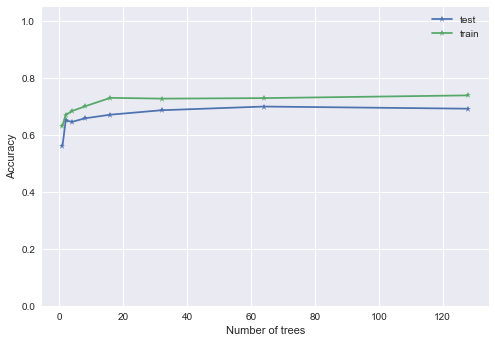

In [40]:
plt.plot(trees, test_scores, '*-', label='test')
plt.plot(trees, train_scores, '*-', label='train')
plt.legend(loc='best')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.ylim((0, 1.05))
plt.show()


### Answer 3.3 

Based on your results, do you find that a larger number of trees necessarily improves the test accuracy of a random forest model? Explain how the number of trees effects the training and test accuracy of a random forest classifier, and how this relates to the bias-variance trade-off for the classifier. 

Test accuracy of a random forest model increases as the number of trees increases from 1 to 8-16. Then there is a plateau. The performance is slightly better than for dropout, indicating that there is some more accuracy via the bagging procedure and overfitting is less here as we see train and test give us about the same results. 

For a low number of trees, there is more variance, as we don't average enough. As we get to a higher number of trees, we start to average out the indiosyncracies of each decision tree. 

So a larger number of trees does not always help, and your best bet to conserve computational resources is to find the appropriate plateau.

### Answer 3.4 

Fixing the number of trees to a reasonable value, apply 5-fold cross-validation to choose the optimal value for the  number of predictors. How does the test performance of random forest model fitted with the optimal number of trees compare with the dropout approach in Question 2?  

(THE NEXT 2 CELLS TAKE SOME TIME TO RUN)

In [41]:
# approach 1 using grid search


est = RandomForestClassifier(n_estimators=32, max_depth=md_best)
param_grid = dict(
    max_features = range(1, 29)
)
gs  = GridSearchCV(est, param_grid = param_grid, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_estimator_)
metrics.accuracy_score(gs.predict(X_test), y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=13, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


0.69120000000000004

In [42]:
# approach 2 using oob (out of bag) in RF command
results = {}
estimators= {}
for f in param_grid['max_features']:
    est = RandomForestClassifier(oob_score=True, 
                                n_estimators=32, max_features=f, max_depth=md_best, n_jobs=-1)
    est.fit(X_train, y_train)
    results[f] = est.oob_score_
    estimators[f] = est
outparams = max(results, key = results.get)
print(outparams, results[outparams])
metrics.accuracy_score(estimators[outparams].predict(X_test), y_test)

26 0.6694


0.68400000000000005

Performance is marginally better, at 0.69ish compared to 0.68ish from Q2.

## Question 4 (15pt): Boosting

We next compare the random forest model with the approach of boosting:

### Answer 4.1

Apply the AdaBoost algorithm to fit an ensemble of decision trees. Set the learning rate to 0.05, and try out different tree depths for the base learners: 1, 2, 10, and unrestricted depth.  Make a plot of the training accuracy of the ensemble classifier as a function of tree depths. Make a similar plot of the test accuracies as a function of number of trees (say $2, 4, 8, 16, \ldots, 256$).

This question seems to be asking for two different plots, one on the training set and one on the test set, which does not help in comparison. We have opted to plot accuracy against number of trees( number of iterations), with different curves for different `max_depth`. This way we can see both trends

This first set of cells is an inefficient but correct way to do this, you are retraining for each new `n_estimators` trees rather than just oiterating forward.

In [41]:
accuracies_train = []
accuracies_test = []
trees = [2**x for x in range(9)]
for md in [1,2,10,None]:
    depth_accuracies_train = []
    depth_accuracies_test = []
    for n in trees:
        ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=md),n_estimators=n, learning_rate=.05)
        depth_accuracies_train.append(metrics.accuracy_score(y_train, ada.fit(X_train,y_train).predict(X_train)))
        depth_accuracies_test.append(metrics.accuracy_score(y_test, ada.fit(X_train,y_train).predict(X_test)))
    accuracies_train.append(depth_accuracies_train)
    accuracies_test.append(depth_accuracies_test)

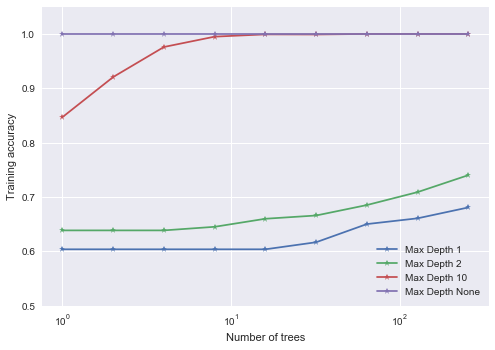

In [42]:
for i, md in enumerate([1,2,10,None]):
    plt.semilogx(trees, accuracies_train[i], '*-', label='Max Depth {}'.format(md))
plt.legend(loc='best')
plt.xlabel("Number of trees")
plt.ylabel("Training accuracy")
plt.ylim((0.5, 1.05))
plt.show()

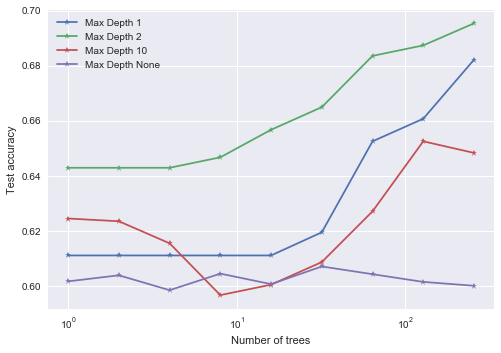

In [43]:
for i, md in enumerate([1,2,10,None]):
    plt.semilogx(trees, accuracies_test[i], '*-', label='Max Depth {}'.format(md))
plt.legend(loc='best')
plt.xlabel("Number of trees")
plt.ylabel("Test accuracy")
#plt.ylim((0.5, 1.05))
plt.show()

The above method is also a little bit misleading. It makes you think that on the training set, the bossting algorithm continutes after a perfect fit is reached in the unrestricted-depth (`None`) case. This is not true. Boosting will terminate after a perfect fit is reached. (see the sklearn `adaboost` docs). Thus the test error you see fluctuating around 0.6 comes from randomness in the 1-iteration training for an unrestricted depth tree, each time you do it.

Here is a more efficient way of doing this, and furthermore does not require you to only sample the number of trees as powers of 2.

In [44]:
accuracies_train = []
accuracies_test = []
for md in [1,2,10,None]:
    depth_accuracies_train = []
    depth_accuracies_test = []
    ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=md),n_estimators=trees[-1], learning_rate=.05)
    ada.fit(X_train,y_train)
    ada_train_gen = ada.staged_predict(X_train)
    ada_test_gen = ada.staged_predict(X_test)
    for train_stagepred in ada_train_gen:    
        depth_accuracies_train.append(metrics.accuracy_score(y_train, train_stagepred))
    for test_stagepred in ada_test_gen:   
        depth_accuracies_test.append(metrics.accuracy_score(y_test, test_stagepred))
    accuracies_train.append(depth_accuracies_train)
    accuracies_test.append(depth_accuracies_test)

The flip side is that you dont have multiple "points" on the graph for the unrestricted depth case, but rather, just one point for both the training and the test graph.

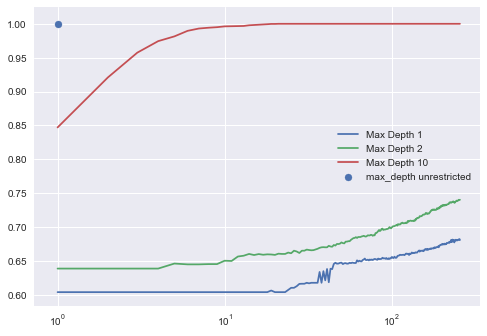

In [45]:
for i, md in enumerate([1,2,10]):
    plt.semilogx(range(1, trees[-1]+1), accuracies_train[i], label='Max Depth {}'.format(md))
plt.scatter([1], accuracies_train[-1], label="max_depth unrestricted")
plt.legend(loc='best')

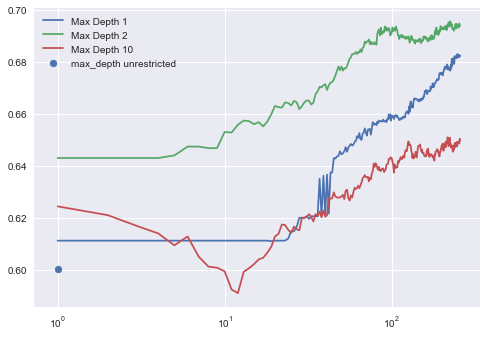

In [46]:
for i, md in enumerate([1,2,10]):
    plt.semilogx(range(1, trees[-1]+1), accuracies_test[i], label='Max Depth {}'.format(md))
plt.scatter([1], accuracies_test[-1], label="max_depth unrestricted")
plt.legend(loc='best')
plt.show()

### Answer 4.2 

How does the number of trees influence the training and test performance? Compare and contrast between the trends you see in the training and test performance of AdaBoost and that of the random forest models in Question 3. Give an explanation for your observations.


**Number of trees**
- Training performance: As number of trees increases, training accuracy increases for both boosting and RF. For RF, accuracy always reaches a plateau, but there does not seem to always be an upper bound for boosting. However, the more trees (iterations) you run, the more residuals you are fitting, and thus you are likely to be overfitting the noise particulars of your sample
- Testing performance: As number of trees increases, testing accuracy increases for RF, until it reaches a plateau. In boosting, the number of trees become important. At higher `max_depths`, where you are likely to overfit, it is quite likely that you will see performance plateau or even fall as you increase the number of iterations. (For stumps there is probably still some fitting to do even for a large number of iterations).

### Answer 4.3 

How does the tree depth of the base learner impact the training and test performance? Recall that with random forests, we allow the depth of the individual trees to be unrestricted. Would you recommend the same strategy for boosting? Explain your answer.

We would not recommend the same strategy for boosting. As we see in the purple curve above for train and test sets, overfitting is evident when the depth of individual trees is unrestricted. (You can even do boosting reasonably well with stumps (depth-1 trees), although you need some depth  if you want to model interactions. 


### Answer 4.4 

Apply 5-fold cross-validation to choose the optimal number of trees $B$ for the ensemble and the optimal tree depth for the base learners. How does an ensemble classifier fitted with the optimal number of trees and the optimal tree depth compare with the random forest model fitted in Question 3.4? 

Here we have done something other than a CV on both params: we've CV'ed the base depth and used the `staged_predict` to see what happens as we increase the number of trees. In as much as adding more trees to gradient boosting (here adaboost) is like deciding how many iterations to go for in a gradient descent, the idea behind finding the "correct number" of trees is finding when to stop.

So what happens here is that we make 300 iterations (trees) and compare the scores after 300 iterations across different `max_depth`s. Then we'll look at the graph of performance against iterations and decide when to stop. Thus the result we will get is not identical to cross-validation, but will give a good idea of which classifier has not overfit by iteration 300, and the best `max_depth` for it.

In [49]:
param_grid_boost = {
              'base_estimator__max_depth': list(range(1,11))
}
gb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=300, learning_rate=.05)
gb_cv = GridSearchCV(gb, param_grid_boost, cv=5, n_jobs=-1)

gb_cv.fit(X_train, y_train)

begb = gb_cv.best_estimator_
begb

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.05, n_estimators=300, random_state=None)

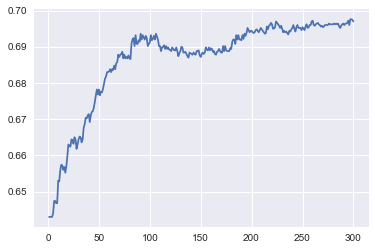

In [50]:
test_scores=[]
for spred in begb.staged_predict(X_test):
    test_scores.append(metrics.accuracy_score(spred, y_test))
plt.plot(range(1, 301), test_scores)

In [51]:
print ("Optimal # trees = ", range(1, 301)[np.argmax(test_scores)])
print ("Optimal depth = ", 2) # from begb printout above

Optimal # trees =  297
Optimal depth =  2


In [52]:
gb_optimized = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2 ), n_estimators=297, learning_rate=.05)

gb_optimized.fit(X_train, y_train).score(X_test, y_test)


0.6976

Performance is marginally better, at 0.70ish compared to 0.69ish from Q3.4

We could of-course do the much more computationally expensive complete cross-validation. Notice here for 256 trees for example, we are refitting the entire model, even though we had gone up to 200 iterations before
!

In [53]:
param_grid_boost2 = {
              'base_estimator__max_depth': list(range(1,11)),
              'n_estimators': [64, 100, 128, 200, 256, 300]
}
gb2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=300, learning_rate=.05)
gb_cv2 = GridSearchCV(gb2, param_grid_boost2, cv=5, n_jobs=-1)

gb_cv2.fit(X_train, y_train)

begb2 = gb_cv2.best_estimator_
begb2

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.05, n_estimators=256, random_state=None)

In [60]:
begb2.fit(X_train, y_train).score(X_test, y_test)

0.69540000000000002

The results are quite comparable! But this fit took me 30 minutes, as opposed to < 10 mins for the previous one!

## Question 5 (3pt): Meta-classifier

We have so far explored techniques that grow a collection of trees either by creating multiple copies of the original training set, or through a sequential procedure, and then combines these trees into a single classifier. Consider an alternate scenario where you are provided with a pre-trained collection of trees, say from different participants of a data science competition for Higgs boson discovery. What would be a good strategy to combine these pre-fitted trees into a single powerful classifier? Of course, a simple approach would be to take the majority vote from the individual trees. Can we do better than this simple combination strategy?

A collection of 100 decision tree classifiers is provided in the file `models.npy` and can be loaded into an array by executing:

`models = np.load('models.npy')`

You can make predictions using the $i^\text{th}$ model on an array of predictors `x` by executing:

`model[i].predict(x)`  &nbsp;&nbsp;&nbsp;
or &nbsp;&nbsp;&nbsp;
`model[i].predict_proba(x)`

and score the model on predictors `x` and labels `y` by using:

`model[i].score(x, y)`.

### Answer 5.1

Implement a strategy to combine the provided decision tree classifiers, and compare the test perfomance of your approach with the majority vote classifier. Explain your strategy/algorithm.



In [54]:
#import warnings
#warnings.filterwarnings("ignore")
models = np.load('models.npy', encoding = 'latin1')

In [55]:
# majority classifier based on the 10 fitted models provided
predictions_train = np.zeros((X_train.shape[0], 100))
predictions_test = np.zeros((X_test.shape[0], 100))

# store the score for each model for future reference
score = []
for i in range(100):
    predictions_train[:,i] = models[i].predict(X_train)
    predictions_test[:,i] = models[i].predict(X_test)
    score.append(models[i].score(X_test, y_test))
    
print("Test Majority: ", metrics.accuracy_score(y_test, (np.mean(predictions_test,axis=1)>.5).astype(float)))
print("Train Majority: ", metrics.accuracy_score(y_train,(np.mean(predictions_train,axis=1)>.5).astype(float)))

Test Majority:  0.6646
Train Majority:  0.6578


In [56]:
# score of the first 10 models
print ("average = ", np.mean(score),", max = ", np.max(score))
score[:10]


average =  0.593988 , max =  0.6264


[0.495,
 0.60199999999999998,
 0.60860000000000003,
 0.61260000000000003,
 0.5272,
 0.59240000000000004,
 0.60099999999999998,
 0.61739999999999995,
 0.60219999999999996,
 0.5948]

Each of the models has a mediocre accuracy rate. We would have to increase the importance of the model with high accuracy, and reduce the importance of the models with lower accuracy. To do this in Python, one may use the predicted values as the predictors in a Logistic Regression model, and the corresponding y as the response. Logistic Regression is able to take the "importance" of each model into account: the "predictors" or models that do well most of the time will have the more significant coefficients.

In [57]:
logreg = LogisticRegressionCV()
y_hat = logreg.fit(predictions_train, y_train).predict(predictions_test)
y_hat_train = logreg.fit(predictions_train, y_train).predict(predictions_train)

print("Test LogReg: ", metrics.accuracy_score(y_test, y_hat))
print("Train LogReg: ", metrics.accuracy_score(y_train, y_hat_train))

Test LogReg:  0.6896
Train LogReg:  0.6976


The test score of 0.69 is higher than what we have from the majority vote classifier from Q2 at 0.679

--- 

---

## APCOMP209a - Homework Question
​
We've worked with imputation methods on missing data in Homework 6.  We've worked with Decision Trees in HW7 and here.  Now let's see what happens if we try to work with Decision Trees and Missing Data at the same time! We'll be working with a dataset from the UCI Machine Learning Repository that uses a variety of wine chemical predictors to classify wines grown in the same region in Italy.  Each line represents 13 (mostly chemical) predictors of the response variable wine class, including things like alcohol content, hue , and phenols.  Unfortunately some of the predictor values were lost in measurement. Please load `wine_quality_missing.csv`. 
​
*Note*: As in HW6 be careful of reading/treating column names and row names in this data set.
​
​
1. Remove all observations that contain and missing values, split the dataset into a 75-25 train-test split, and fit the sklearn DecisionTreeClassifier and RandomForestClassifier.   Use cross-validation to find the optimal tree depth for each method.  Report the optimal tree-depth, overall classification rate and confusion matrix on the test set for each method.
2. Restart with a fresh copy of the data and impute the missing data via mean imputation.  Split the data 75-25 and again fit DecisionTreeClassifier and RandomForestClassifier using cross-validation to find the optimal tree depth.  Report the optimal tree depth, overall classification rate and confusion matrix on the test set for each method.  
3. Again restart with a fresh copy of the data but this time let's try something different.  As discussed in section, CART Decision Trees can take advantage of surrogate splits to handle missing data.  Split the data 75-25 and construct a **custom** decision tree model and train it on the training set with missing data. Report the optimal tree depth, overall classification rate and confusion matrix on the test set and compare your results to the Imputation and DecisionTree model results in part 1 & 2.


In [130]:
from pandas import read_csv
data = read_csv("wine_quality_missing.csv")

In [131]:
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,NaN,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,NaN,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,NaN,4.32,1.04,2.93,735.0,1


In [132]:
data_missing_drop = data.copy()
data_missing_mean = data.copy()
data_missing_dt = data.copy()

**1. Remove all observations that contain and missing values, split the dataset into a 75-25 train-test split, and fit the sklearn DecisionTreeClassifier and RandomForestClassifier.   Use cross-validation to find the optimal tree depth for each method.  Report the optimal tree-depth, overall classification rate and confusion matrix on the test set for each method.**

In [133]:
## Drop missing values
data_missing_drop.dropna(inplace=True)

np.random.seed(9001)
msk = np.random.rand(len(data_missing_drop)) < 0.75
data_missing_drop_train = data_missing_drop[msk]
data_missing_drop_test = data_missing_drop[~msk]

X_drop_train = data_missing_drop_train.iloc[:, :-1]
y_drop_train =data_missing_drop_train.iloc[:, -1]
X_drop_test = data_missing_drop_test.iloc[:, :-1]
y_drop_test =data_missing_drop_test.iloc[:, -1]

In [134]:
print(len(data_missing_drop))

43


#### Decision Tree

In [135]:
# 5-fold cross validation on decision tree
dt_train_scores = []
depths = list(range(2,11))
for depth in depths:
    clf = DecisionTreeClassifier(max_depth = depth)  
    score = cross_val_score(estimator=clf, X=X_drop_train, y=y_drop_train, cv=5)
    dt_train_scores.append(np.mean(score))

In [136]:
dt_train_scores

[0.72285714285714275,
 0.76285714285714279,
 0.81999999999999995,
 0.72285714285714275,
 0.76285714285714279,
 0.73428571428571432,
 0.73428571428571432,
 0.72285714285714275,
 0.75142857142857145]

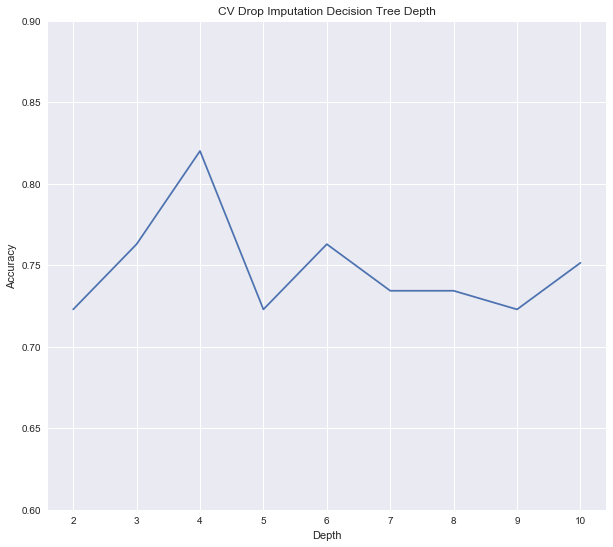

In [137]:
plt.figure(figsize=(10, 9))
plt.plot(depths, dt_train_scores)

plt.ylim(0.6,.9)

plt.title('CV Drop Imputation Decision Tree Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

**From CV, it looks like best choice for Decision Tree depth is 4 **

In [138]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(data_missing_drop_train.iloc[:,:-1], data_missing_drop_train.iloc[:,-1])
print('Optimal Decision Tree Depth: 4')
print ('Train score:', clf.score(X_drop_train, y_drop_train))
print ('Test score:', clf.score(X_drop_test, y_drop_test))

Optimal Decision Tree Depth: 4
Train score: 1.0
Test score: 1.0


In [141]:
yhat_drop_train = clf.predict(X_drop_train)
print("Confusion Matrix Train:")
print(confusion_matrix(yhat_drop_train, y_drop_train))
print("Confusion Matrix Test:")
yhat_drop_test = clf.predict(X_drop_test)
print(confusion_matrix(yhat_drop_test, y_drop_test))

Confusion Matrix Train:
[[11  0  0]
 [ 0  9  0]
 [ 0  0  6]]
Confusion Matrix Test:
[[6 0 0]
 [0 8 0]
 [0 0 3]]


#### Random Forest

In [142]:
# 5-fold cross validation on Random Forest
rf_train_scores = []
depths = list(range(2,11))
for depth in depths:
    clf = RandomForestClassifier(max_depth = depth)  
    score = cross_val_score(estimator=clf, X=X_drop_train, y=y_drop_train, cv=5)
    rf_train_scores.append(np.mean(score))

In [143]:
rf_train_scores

[0.9028571428571428,
 0.79428571428571426,
 0.80000000000000004,
 0.78285714285714281,
 0.82285714285714273,
 0.82285714285714273,
 0.79428571428571426,
 0.89142857142857146,
 0.9028571428571428]

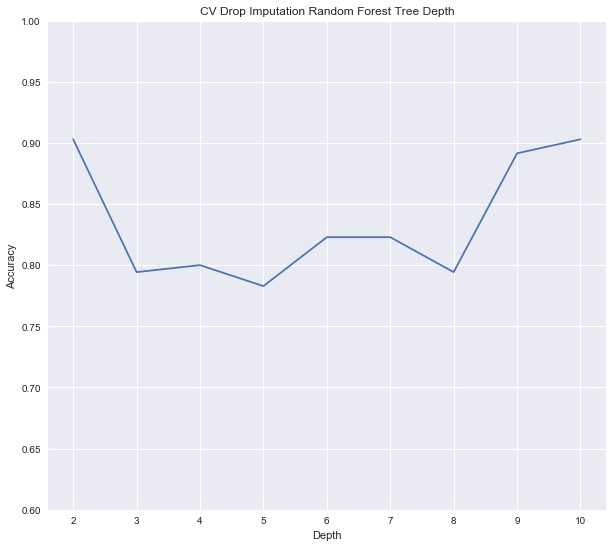

In [144]:
plt.figure(figsize=(10, 9))
plt.plot(depths, rf_train_scores)

plt.ylim(0.6,1.0)

plt.title('CV Drop Imputation Random Forest Tree Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

**From CV, it looks like best choice for Random Forest Tree depth is 4 **

In [145]:
clf = RandomForestClassifier(max_depth=4)
clf.fit(X_drop_train, y_drop_train)
print('Optimal Random Forest Tree Depth: 4')
print ('Train score:', clf.score(X_drop_train, y_drop_train))
print ('Test score:', clf.score(X_drop_test, y_drop_test))

Optimal Random Forest Tree Depth: 4
Train score: 1.0
Test score: 1.0


In [146]:
yhat_drop_train = clf.predict(X_drop_train)
print("Confusion Matrix Train:")
print(confusion_matrix(yhat_drop_train, y_drop_train))
print("Confusion Matrix Test:")
yhat_drop_test = clf.predict(X_drop_test)
print(confusion_matrix(yhat_drop_test, y_drop_test))

Confusion Matrix Train:
[[11  0  0]
 [ 0  9  0]
 [ 0  0  6]]
Confusion Matrix Test:
[[6 0 0]
 [0 8 0]
 [0 0 3]]


**2. Restart with a fresh copy of the data and impute the missing data via mean imputation.  Split the data 75-25 and again fit DecisionTreeClassifier and RandomForestClassifier using cross-validation to find the optimal tree depth.  Report the optimal tree depth, overall classification rate and confusion matrix on the test set for each method.**

In [149]:
imputer = Imputer( strategy='mean')
data_missing_mean = imputer.fit_transform(data_missing_mean.values)
msk = np.random.rand(len(data_missing_mean)) < 0.75
data_missing_mean_train = data_missing_mean[msk]
data_missing_mean_test = data_missing_mean[~msk]

X_mean_train = data_missing_mean_train[:, :-1]
y_mean_train =data_missing_mean_train[:, -1]
X_mean_test = data_missing_mean_test[:, :-1]
y_mean_test =data_missing_mean_test[:, -1]

In [150]:
# 5-fold cross validation on decision tree
dt_mean_train_scores = []
depths = list(range(2,11))
for depth in depths:
    clf = DecisionTreeClassifier(max_depth = depth)  
    score = cross_val_score(estimator=clf, X=X_mean_train, y=y_mean_train, cv=5)
    dt_mean_train_scores.append(np.mean(score))

In [151]:
dt_mean_train_scores

[0.81258689458689459,
 0.83540170940170932,
 0.85876597476597483,
 0.83623606023606034,
 0.851094017094017,
 0.85164346764346777,
 0.86674318274318263,
 0.83595115995115987,
 0.82768660968660979]

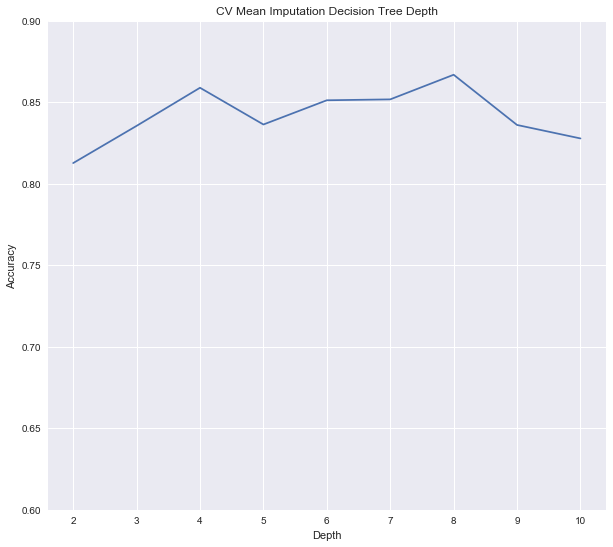

In [152]:
plt.figure(figsize=(10, 9))
plt.plot(depths, dt_mean_train_scores)

plt.ylim(0.6,.9)

plt.title('CV Mean Imputation Decision Tree Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')


**From CV on Mean Imputation it seems like the best choice for Decision Tree depth is 4**

In [153]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_mean_train, y_mean_train)
print('Optimal Tree Depth: 4')
print ('Train score:', clf.score(X_mean_train,y_mean_train))
print ('Test score:', clf.score(X_mean_test, y_mean_test))

Optimal Tree Depth: 4
Train score: 0.954198473282
Test score: 0.872340425532


In [154]:
yhat_mean_train = clf.predict(X_mean_train)
print("Confusion Matrix Train:")
print(confusion_matrix(yhat_mean_train, y_mean_train))
print("Confusion Matrix Test:")
yhat_mean_test = clf.predict(X_mean_test)
print(confusion_matrix(yhat_mean_test, y_mean_test))

Confusion Matrix Train:
[[42  4  1]
 [ 0 49  1]
 [ 0  0 34]]
Confusion Matrix Test:
[[16  3  1]
 [ 1 15  1]
 [ 0  0 10]]


#### Random Forest

In [155]:
# 5-fold cross validation on decision tree
rf_mean_train_scores = []
depths = list(range(2,11))
for depth in depths:
    clf = RandomForestClassifier(max_depth = depth)  
    score = cross_val_score(estimator=clf, X=X_mean_train, y=y_mean_train, cv=5)
    rf_mean_train_scores.append(np.mean(score))

In [156]:
rf_mean_train_scores

[0.9104371184371185,
 0.93320634920634915,
 0.9186788766788766,
 0.96347171347171356,
 0.94918599918599933,
 0.95632885632885622,
 0.92641432641432642,
 0.9546349206349205,
 0.93296459096459095]

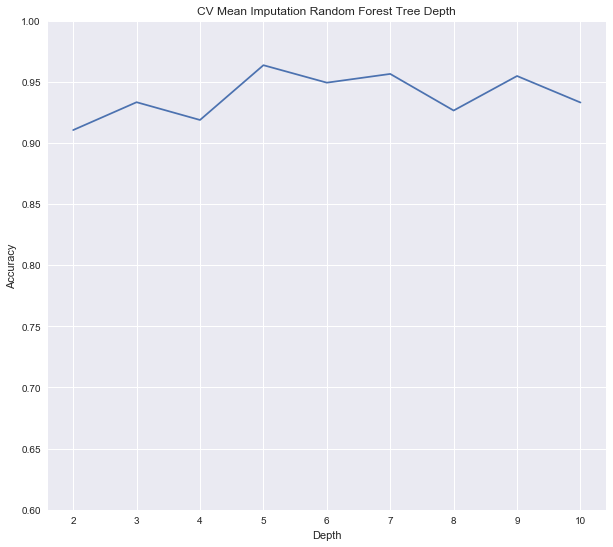

In [157]:
plt.figure(figsize=(10, 9))
plt.plot(depths, rf_mean_train_scores)

plt.ylim(0.6,1.0)

plt.title('CV Mean Imputation Random Forest Tree Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

**From CV it looks like the optimal max_tree_depth for Random Forest in mean Imputation is 7**

In [158]:
clf = RandomForestClassifier(max_depth=7)
clf.fit(X_mean_train, y_mean_train)
print('Optimal Random Forest Tree Depth: 7')
print ('Train score:', clf.score(X_mean_train, y_mean_train))
print ('Test score:', clf.score(X_mean_test, y_mean_test))

Optimal Random Forest Tree Depth: 7
Train score: 1.0
Test score: 0.914893617021


In [159]:
yhat_mean_train = clf.predict(X_mean_train)
print("Confusion Matrix Train:")
print(confusion_matrix(yhat_mean_train, y_mean_train))
print("Confusion Matrix Test:")
yhat_mean_test = clf.predict(X_mean_test)
print(confusion_matrix(yhat_mean_test, y_mean_test))

Confusion Matrix Train:
[[42  0  0]
 [ 0 53  0]
 [ 0  0 36]]
Confusion Matrix Test:
[[16  2  0]
 [ 1 16  1]
 [ 0  0 11]]


**Again restart with a fresh copy of the data but this time let's try something different.  As discussed in section, CART Decision Trees can take advantage of surrogate splits to handle missing data.  Split the data 75-25 and construct a **custom** decision tree model and train it on the training set with missing data. Report the optimal tree depth, overall classification rate and confusion matrix on the test set and compare your results to the Imputation and DecisionTree model results in part 1 & 2.**

In [160]:
# import our Custom Decision Tree
import AC209Tree

In [161]:
import importlib
importlib.reload(AC209Tree)

<module 'AC209Tree' from '/Users/pavlos/Teaching/Teaching2017/cs109a/Homework/HW8/AC209Tree.py'>

In [162]:
np.random.seed(9001)
msk = np.random.rand(len(data_missing_dt)) < 0.75
data_missing_dt_train = data_missing_dt[msk]
data_missing_dt_test = data_missing_dt[~msk]

X_dt_train = data_missing_dt_train.iloc[:, :-1]
y_dt_train =data_missing_dt_train.iloc[:, -1]
X_dt_test = data_missing_dt_test.iloc[:, :-1]
y_dt_test =data_missing_dt_test.iloc[:, -1]

In [163]:
root_node=AC209Tree.build_tree(data_missing_dt_train.as_matrix(), max_depth=3)

In [75]:
predictions = AC209Tree.predict(root_node, data_missing_dt_test.as_matrix())

In [76]:
AC209Tree.accuracy_metric(predictions,data_missing_dt_test.as_matrix()[:,-1])

81.81818181818183

In [165]:
dt_custom_train_scores = []

for cv_train, cv_test in KFold(n_splits=5, shuffle=True).split(data_missing_dt_train.index):
    # in general though its good for creating consistent psets, don't put seeds into kfold
    # split
    data_dt_train_cv = data_missing_dt_train.iloc[cv_train,:]
    data_dt_test_cv = data_missing_dt_train.iloc[cv_test,:]
    
    depths = list(range(2,11))
    fold_scores = []
    for depth in depths:
        tree_cv = AC209Tree.build_tree(data_dt_train_cv.as_matrix(), max_depth =depth)
        predictions = AC209Tree.predict(tree_cv, data_dt_test_cv.as_matrix())
        fold_scores.append(AC209Tree.accuracy_metric(predictions,data_dt_test_cv.as_matrix()[:,-1]))
        
    dt_custom_train_scores.append(fold_scores)
        
        
    

In [166]:
dt_custom_train_scores = np.array(dt_custom_train_scores)

In [167]:
dt_custom_train_means = dt_custom_train_scores.mean(axis=0)

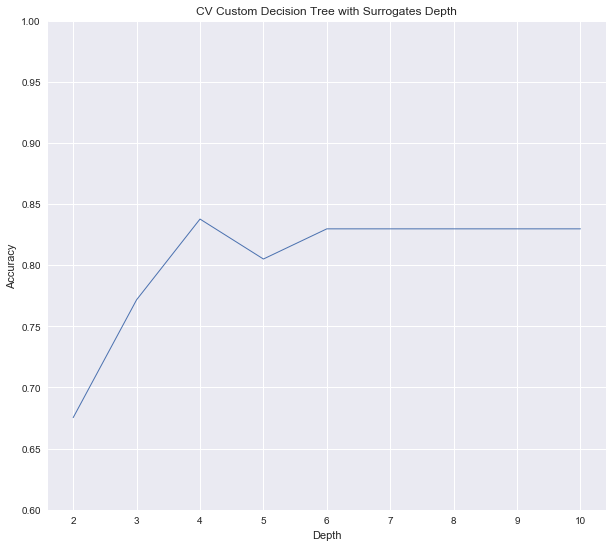

In [168]:
plt.figure(figsize=(10, 9))
plt.plot(depths, dt_custom_train_means, lw=1)

plt.ylim(0.6,1.0)

plt.title('CV Custom Decision Tree with Surrogates Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

**From CV it looks like the optimal max_tree_depth for Custom Decision Tree is 5**

In [169]:
custom_tree=AC209Tree.build_tree(data_missing_dt_train.as_matrix(), max_depth=5)

## Training Predictions
yhat_custom_train = AC209Tree.predict(custom_tree, X_dt_train.as_matrix())
train_score = AC209Tree.accuracy_metric(yhat_custom_train,y_dt_train.as_matrix())

## Test Predictions
yhat_custom_test = AC209Tree.predict(custom_tree, X_dt_test.as_matrix())
test_score = AC209Tree.accuracy_metric(yhat_custom_test,y_dt_test.as_matrix())

print('Optimal Custom Decision Tree Depth: 5')
print ('Train score:', train_score)
print ('Test score:', test_score)



Optimal Custom Decision Tree Depth: 5
Train score: 0.975609756097561
Test score: 0.8727272727272727


In [170]:
print("Confusion Matrix Train:")
print(confusion_matrix(yhat_custom_train, y_dt_train))
print("Confusion Matrix Test:")
print(confusion_matrix(yhat_custom_test, y_dt_test))

Confusion Matrix Train:
[[38  0  0]
 [ 1 53  2]
 [ 0  0 29]]
Confusion Matrix Test:
[[17  0  1]
 [ 3 17  2]
 [ 0  1 14]]


#### Thoughts

We see that scores under the custom decision tree are comparable (but in this case slightly outperform) those of drop imputatation and mean imputation but aren't quite as good as Random Forest in mean imputation (although somewhat comparable).  What doesn't show in our results but would come out in repeated runs is that our custom implementation of decision trees which handle missing data via surrogate splits are much more stable (in results) than drop imputation (which makes sense since drop imputation leaves only 47 out of 178 points for the model to learn) and even mean imputation.